In [159]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Carregar o conjunto de dados Wine
wine = load_wine()

In [161]:
# Dividir os dados em recursos (X) e rótulos (y)
X = wine.data
y = wine.target

In [194]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [195]:
# Criar um modelo de regressão logística com solver 'liblinear'
model = LogisticRegression(solver='liblinear')

# Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [196]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [197]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = wine.target_names

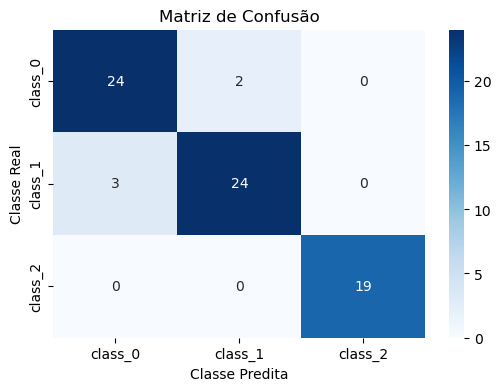

In [198]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

In [199]:
# Calcular o recall para cada classe
recall = recall_score(y_test, y_pred, average=None)

In [200]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)


In [201]:
# Avaliando o desempenho do modelo
acc = accuracy_score(y_test, y_pred)
print("Acurácia : {:.2f}%".format(acc*100))

Acurácia : 93.06%


In [202]:
# Calcular o F-score
fscore = f1_score(y_test, y_pred, average='weighted')

In [203]:
# Calcular a curva ROC
probs = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test, probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

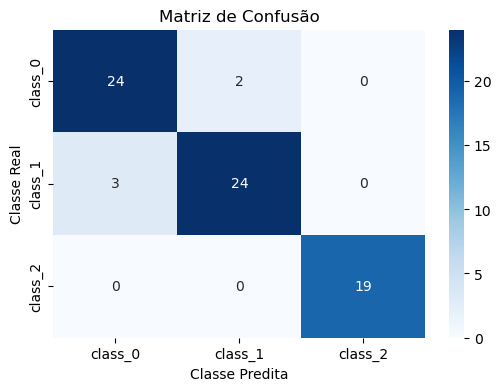

Recall para cada classe:
Recall para a classe class_0: 0.9230769230769231
Recall para a classe class_1: 0.8888888888888888
Recall para a classe class_2: 1.0
Acurácia: 0.9305555555555556
F-score: 0.9305555555555556
Área sob a curva ROC: {0: 0.9941471571906355, 1: 0.9950617283950618, 2: 1.0}


In [204]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

print("Recall para cada classe:")
for i in range(len(labels)):
    print(f"Recall para a classe {labels[i]}: {recall[i]}")
print("Acurácia:", accuracy)
print("F-score:", fscore)
print("Área sob a curva ROC:", roc_auc)

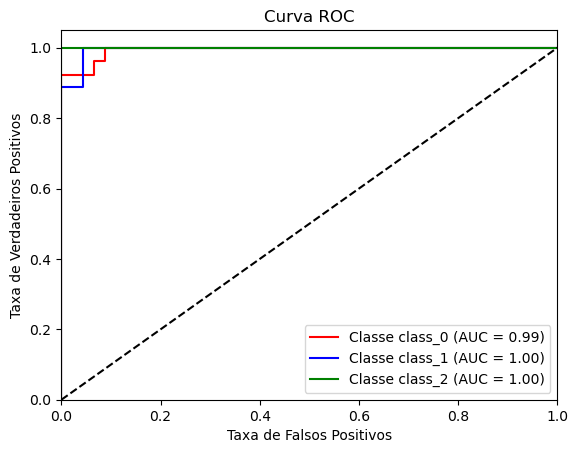

In [205]:
# Plotar a curva ROC
plt.figure()
colors = ['red', 'blue', 'green']
for i, color in zip(range(len(labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Classe {labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()